# imports 

In [31]:
from sklearn import datasets as dt
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics as m
from IPython import display
import time

from sklearn import cluster as c

# datasets 

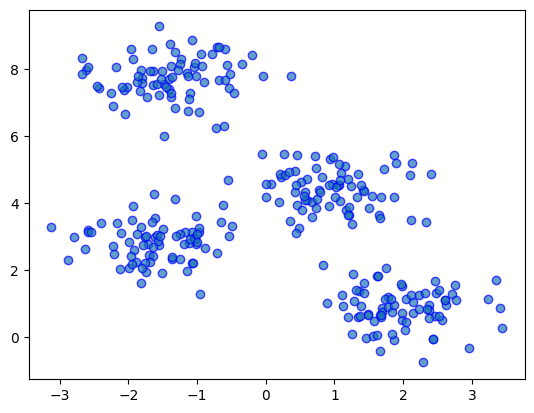

In [9]:
x, _ = dt.make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.6,
    random_state=0
)

plt.scatter(
    x[:, 0], x[:, 1],
    alpha= 0.7,
    edgecolors= 'b'
)

# training

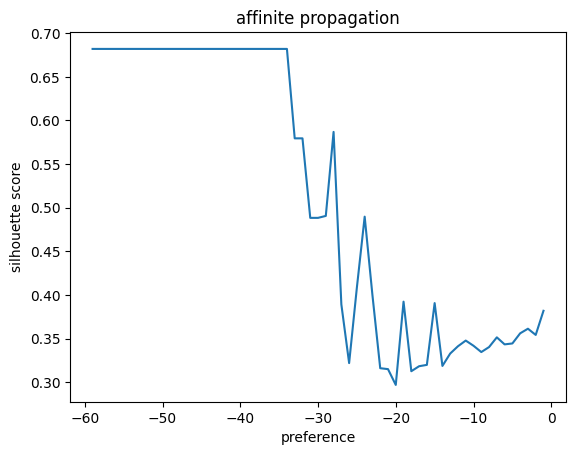

<Figure size 640x480 with 0 Axes>

In [36]:
p = np.arange(-1, -61, -1)
ss_list = list()

for i in range(len(p)):
    # model definition
    model = c.AffinityPropagation(preference=p[i])
    
    # model training
    model.fit(x)
    
    # model performance
    labels = model.predict(x)

    # performance
    ss = m.silhouette_score(x, labels)
    ss_list.append(ss)

    # plot
    plt.plot(p[:i], ss_list[:i])
    plt.title('affinite propagation')
    plt.xlabel('preference')
    plt.ylabel('silhouette score')

    display.clear_output(wait=True)
    plt.show()
    plt.gcf()
    time.sleep(0.05)
    

# final clustering

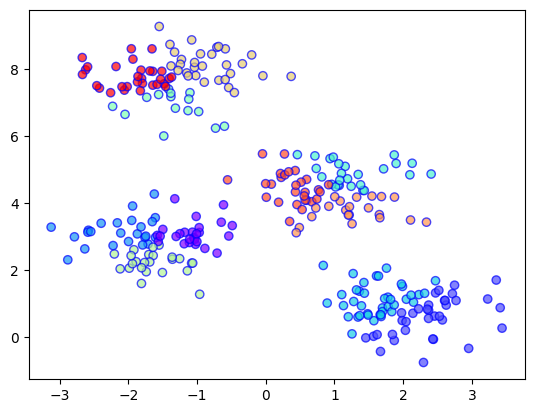

In [40]:
p_best = -33
af = c.AffinityPropagation()
af.fit(x)

labels = af.predict(x)
fig = plt.figure()

plt.scatter(
    x[:, 0], x[:, 1],
    c= labels,
    cmap= 'rainbow',
    alpha= 0.7,
    edgecolors= 'b'
)